In [11]:
import pandas as pd
import sys
import os

pd.set_option('display.max_columns', 100)
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial


In [12]:
os.chdir('/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial')
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


cpdb_file_path = '/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/db/test/v5.0.0/cellphonedb.zip'
meta_file_path = '/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/meta_file.tsv'
counts_file_path = '/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/processed_adata_final.h5ad'
# microenvs_file_path = 'data/microenvironment.tsv'
out_path = '/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method1'




Current Working Directory: /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial


In [13]:
from cellphonedb.src.core.methods import cpdb_analysis_method

cpdb_results = cpdb_analysis_method.call(
    cpdb_file_path = cpdb_file_path,           # mandatory: CellphoneDB database zip file.
    meta_file_path = meta_file_path,           # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,       # mandatory: normalized count matrix - a path to the counts file, or an in-memory AnnData object
    counts_data = 'hgnc_symbol',               # defines the gene annotation in counts matrix.
    # microenvs_file_path = microenvs_file_path, # optional (default: None): defines cells per microenvironment.
    score_interactions = True,                 # optional: whether to score interactions or not. 
    output_path = out_path,                    # Path to save results    microenvs_file_path = None,
    separator = '|',                           # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    threads = 5,                               # number of threads to use in the analysis.
    threshold = 0.1,                           # defines the min % of cells expressing a gene for this to be employed in the analysis.
    result_precision = 3,                      # Sets the rounding for the mean values in significan_means.
    debug = False,                             # Saves all intermediate tables emplyed during the analysis in pkl format.
    output_suffix = None                       # Replaces the timestamp in the output files by a user defined string in the  (default: None)
)

[ ][CORE][30/07/24-13:37:24][INFO] [Non Statistical Method] Threshold:0.1 Precision:3
Reading user files...
The following user files were loaded successfully:
/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/processed_adata_final.h5ad
/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/meta_file.tsv
[ ][CORE][30/07/24-13:37:30][INFO] Running Basic Analysis
[ ][CORE][30/07/24-13:37:30][INFO] Building results
[ ][CORE][30/07/24-13:37:30][INFO] Scoring interactions: Filtering genes per cell type..


100%|██████████| 4/4 [00:00<00:00, 33.92it/s]

[ ][CORE][30/07/24-13:37:30][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|██████████| 4/4 [00:00<00:00, 157.32it/s]


[ ][CORE][30/07/24-13:37:31][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


100%|██████████| 16/16 [00:02<00:00,  5.63it/s]


Saved means_result to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method1/simple_analysis_means_result_07_30_2024_133734.txt
Saved deconvoluted to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method1/simple_analysis_deconvoluted_07_30_2024_133734.txt
Saved deconvoluted_percents to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method1/simple_analysis_deconvoluted_percents_07_30_2024_133734.txt
Saved interaction_scores to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method1/simple_analysis_interaction_scores_07_30_2024_133734.txt


In [14]:
cpdb_results['interaction_scores'].head(2)

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,directionality,classification,Astrocyte|Astrocyte,Astrocyte|Microglia,Astrocyte|Neuron,Astrocyte|Oligodendrocyte,Microglia|Astrocyte,Microglia|Microglia,Microglia|Neuron,Microglia|Oligodendrocyte,Neuron|Astrocyte,Neuron|Microglia,Neuron|Neuron,Neuron|Oligodendrocyte,Oligodendrocyte|Astrocyte,Oligodendrocyte|Microglia,Oligodendrocyte|Neuron,Oligodendrocyte|Oligodendrocyte
0,CPI-SC0A2DB962D,CDH1_integrin_a2b1_complex,simple:P12830,complex:integrin_a2b1_complex,CDH1,NaN,False,False,False,curated,True,Adhesion-Adhesion,Adhesion by Cadherin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CPI-SC0B5CEA47D,COL10A1_integrin_a2b1_complex,simple:Q03692,complex:integrin_a2b1_complex,COL10A1,NaN,True,False,False,curated,True,Adhesion-Adhesion,Adhesion by Collagen/Integrin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
out_path = '/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method2'

from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results_2 = cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellphoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix - a path to the counts file, or an in-memory AnnData object
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.
    # active_tfs_file_path = active_tf_path,           # optional: defines cell types and their active TFs.
    # microenvs_file_path = microenvs_file_path,       # optional (default: None): defines cells per microenvironment.
    score_interactions = True,                       # optional: whether to score interactions or not. 
    iterations = 1000,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.1,                                 # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 5,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = None                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )


Reading user files...
The following user files were loaded successfully:
/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/processed_adata_final.h5ad
/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/meta_file.tsv
[ ][CORE][30/07/24-13:37:40][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:42 Threads:5 Precision:3
[ ][CORE][30/07/24-13:37:40][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][30/07/24-13:37:40][INFO] Running Real Analysis
[ ][CORE][30/07/24-13:37:40][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [01:10<00:00, 14.24it/s]

[ ][CORE][30/07/24-13:38:51][INFO] Building Pvalues result
[ ][CORE][30/07/24-13:38:51][INFO] Building results


[ ][CORE][30/07/24-13:38:51][INFO] Scoring interactions: Filtering genes per cell type..


100%|██████████| 4/4 [00:00<00:00, 32.28it/s]

[ ][CORE][30/07/24-13:38:51][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|██████████| 4/4 [00:00<00:00, 141.69it/s]


[ ][CORE][30/07/24-13:38:51][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


100%|██████████| 16/16 [00:02<00:00,  5.60it/s]


Saved deconvoluted to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method2/statistical_analysis_deconvoluted_07_30_2024_133855.txt
Saved deconvoluted_percents to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method2/statistical_analysis_deconvoluted_percents_07_30_2024_133855.txt
Saved means to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method2/statistical_analysis_means_07_30_2024_133855.txt
Saved pvalues to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method2/statistical_analysis_pvalues_07_30_2024_133855.txt
Saved significant_means to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method2/statistical_analysis_significant_means_07_30_2024_133855.txt
Saved interaction_scores to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method2/statisti

In [16]:
list(cpdb_results_2.keys())


['deconvoluted',
 'deconvoluted_percents',
 'means',
 'pvalues',
 'significant_means',
 'CellSign_active_interactions',
 'CellSign_active_interactions_deconvoluted',
 'interaction_scores']

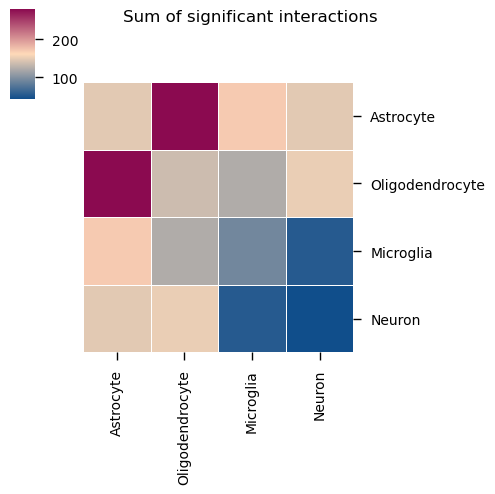

In [17]:
import os
import anndata as ad
import pandas as pd
import ktplotspy as kpy
import matplotlib.pyplot as plt
%matplotlib inline

kpy.plot_cpdb_heatmap(pvals = cpdb_results_2['pvalues'],
                      degs_analysis = False,
                      figsize = (5, 5),
                      title = "Sum of significant interactions")

In [34]:
kpy.plot_cpdb(
    adata = adata,
    cell_type1 = "Microglia Microglia|Astrocyte Astrocyte|Microglia Astrocyte",
    cell_type2 = "Microglia|Astrocyte Astrocyte|Microglia Microglia Astrocyte",
    means = cpdb_results['means'],
    pvals = cpdb_results['pvalues'],
    celltype_key = "cell_labels",
    genes = [ "CSF1R"],
    figsize = (10, 3),
    title = "Interactions between\nPV and trophoblast",
    max_size = 3,
    highlight_size = 0.75,
    degs_analysis = False,
    standard_scale = True,
    interaction_scores = cpdb_results['interaction_scores'],
    scale_alpha_by_interaction_scores = True
)


NameError: name 'adata' is not defined

In [32]:
cpdb_results_2['significant_means']

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,directionality,classification,rank,Astrocyte|Astrocyte,Astrocyte|Microglia,Astrocyte|Neuron,Astrocyte|Oligodendrocyte,Microglia|Astrocyte,Microglia|Microglia,Microglia|Neuron,Microglia|Oligodendrocyte,Neuron|Astrocyte,Neuron|Microglia,Neuron|Neuron,Neuron|Oligodendrocyte,Oligodendrocyte|Astrocyte,Oligodendrocyte|Microglia,Oligodendrocyte|Neuron,Oligodendrocyte|Oligodendrocyte
1927,CPI-SS098C2FFC0,DLL3_NOTCH4,simple:Q9NYJ7,simple:Q99466,DLL3,NOTCH4,False,False,True,curated,False,Ligand-Receptor,Signaling by Notch,0.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320,NaN,NaN,NaN
1830,CPI-CS0215886EA,LTC4_byLTC4S_CYSLTR1,complex:LTC4_byLTC4S,simple:Q9Y271,NaN,CYSLTR1,True,False,True,curated,False,Ligand-Receptor,Signaling by Lipoxin/Leukotriene,0.062,NaN,NaN,NaN,NaN,NaN,0.186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,CPI-CS05357F38C,Adenosine_byNT5E_and_SLC29A1_ADORA2B,complex:Adenosine_byNT5E_and_SLC29A1,simple:P29275,NaN,ADORA2B,True,False,True,curated,False,Ligand-Receptor,Signaling by Adenosine,0.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.104,NaN,NaN,NaN
1253,CPI-CS0D5D712A6,Glutamate_byGLS_and_SLC1A1_GRIA1,complex:Glutamate_byGLS_and_SLC1A1,simple:P42261,NaN,GRIA1,True,False,True,curated,False,Ligand-Receptor,Signaling by Glutamate,0.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.398,NaN
810,CPI-SS035DE17DA,C1QL4_ADGRB3,simple:Q86Z23,simple:O60242,C1QL4,ADGRB3,True,False,True,curated,False,Ligand-Receptor,Signaling by Complement,0.062,0.289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,CPI-CC026C1BCB7,GABA_byGAD2_and_SLC6A13_GABA-A_a2b3g2S_complex,complex:GABA_byGAD2_and_SLC6A13,complex:GABA-A_a2b3g2S_complex,NaN,NaN,True,False,True,curated,False,Ligand-Receptor,Signaling by GABA,1.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096,CPI-CC02F84E602,GABA_byGAD2_and_SLC6A12_GABA-A_a2b3g2S_complex,complex:GABA_byGAD2_and_SLC6A12,complex:GABA-A_a2b3g2S_complex,NaN,NaN,True,False,True,curated,False,Ligand-Receptor,Signaling by GABA,1.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,CPI-CC08E2CA1DE,GABA_byGAD2_and_SLC6A11_GABA-A_a2b3g2S_complex,complex:GABA_byGAD2_and_SLC6A11,complex:GABA-A_a2b3g2S_complex,NaN,NaN,True,False,True,curated,False,Ligand-Receptor,Signaling by GABA,1.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,CPI-CC03764C8A9,GABA_byGAD2_and_SLC32A1_GABA-A_a2b3g2S_complex,complex:GABA_byGAD2_and_SLC32A1,complex:GABA-A_a2b3g2S_complex,NaN,NaN,True,False,True,curated,False,Ligand-Receptor,Signaling by GABA,1.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#cpdb induction between neuron and microglia
# astrocyte and microglia
# oligodendrocyte and microglia

# What does each table mean / difference between the two methods
# Monocuture datasset: check how many clusters 

# Start with one candidate gene: CSF1R

import scanpy as sc

# Load the .h5ad file
adata = sc.read_h5ad('./processed_adata_final.h5ad')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = './processed_adata_final.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
adata

AnnData object with n_obs × n_vars = 8331 × 25523
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_res_0.02', 'leiden_res_0.50', 'leiden_res_2.00', 'cell_type_lvl1'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'cell_type_lvl1_colors', 'dendrogram_leiden_res_0.50', 'hvg', 'leiden', 'leiden_colors', 'leiden_res_0.02', '

In [ ]:
# Display all unique cell types
print(adata.obs['cell_type_lvl1'].unique())


['Neuron', 'Oligodendrocyte', 'Astrocyte', 'Microglia']
Categories (4, object): ['Astrocyte', 'Microglia', 'Neuron', 'Oligodendrocyte']


In [ ]:
import pandas as pd

# Load the significant interactions file
significant_means = pd.read_csv('/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method2/statistical_analysis_significant_means_07_23_2024_162251.txt', sep='\t')

# Filter for interactions involving microglia and astrocytes
# Assuming the columns include 'interacting_pair', 'microglia', 'astrocyte', and 'p_value' among others
filtered_interactions = significant_means[
    (significant_means['microglia|astrocyte'] > 0) & (significant_means['astrocyte|microglia'] > 0)
]

# Display the filtered interactions
print(filtered_interactions)


KeyError: 'microglia'